<a href="https://colab.research.google.com/github/GeraldEspi/ADA-informes/blob/main/informe8_optimalBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.- Problema del Binary Search Tree óptimo

En las ciencias de computación un Optimal BST `(conocido en español como Árbol Binario de Búsqueda Óptimo)` es un árbol binario de búsqueda que se encarga de ejecutar el menor tiempo de búsqueda que sea posible, es decir, ejecutar el algoritmo de manera óptima.  

![image](https://cdn.discordapp.com/attachments/838249461268217916/1030610898475294790/Screenshot20220730at30104AM-660x431_1.png)

Este algoritmo presenta dos tipos de aproximaciones, `Estática` y `Dinámica`. En este informe concretamente se abordará la aproximación dinámica.

Se establece.

> **Entrada**: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen **claves ficticias $d_i$** que representan **búsquedas fallidas** con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

> **Salida**: Construir un **árbol de búsqueda óptimo**, es decir, un árbol que **minimice la cantidad esperada de nodos visitados (costo esperado)**.

Al igual que los algoritmos de ordenamiento buscan reducir los **tiempos de ejecución**. Menores tiempos de ejecución significan una mayor eficiencia y por lo tanto, nuevas instancias para realizar búsquedas.




# Código


### **Mostrar matriz**

In [ ]:
def ShowMatrix(M, title = "", decimal=True):
  if(len(title) > 1): print(f"{title}:") 
  for i in range(len(M)):
    for j in range(len(M)):
      if (decimal): print("{:.20f}".format(M[i][j]), end=(""))
      else: print("{:.1f}".format(M[i][j]), end=(""))
      if(j < len(M)-1): print(",", end=(" "))
      else: print(" ")

### **Generador de instancias**

In [ ]:
import random
import numpy as np

def OBIG(n): # optimal_bst_instance_generator
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q
    
keys, p, q = OBIG(10)

print(colored("keys:","yellow"),keys)
print(colored("real:","yellow"),p)
print(colored("ficticia:","yellow"),q)

keys: [5, 6, 25, 27, 35, 50, 53, 60, 64, 66]
real: [0.007440334337372903, 0.03557212458764808, 0.009749666863798152, 0.03399449614398429, 0.025236670346900077, 0.04358944704298987, 0.007954677134516754, 0.08960791539846526, 0.07710666729919036, 0.0868275964704795]
ficticia: [0.00538353 0.00024571 0.09968248 0.07149302 0.05548429 0.07336462
 0.09258861 0.02783327 0.09457546 0.00308045 0.05918898]


### **Impelementación Recursiva**

>**Paradigma**: Fuerza bruta

In [ ]:
import random
import numpy as np
from termcolor import colored


recursiveCall = 0

# Funcion recursiva para calcular el costo optimo
def StaticBST(freq, i, j, verbose):
    global recursiveCall 
    if verbose: 
        if recursiveCall > 0: print(colored(f"¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨","green"),
                                         colored("\nLlamada recursiva número: ","blue"),recursiveCall)
        print(colored("**************************************************************************************************************","green"))
        print(colored("El largo corresponde a","grey"), j-i+1, colored("datos","grey"))

    # Casos base
    if j < i:     # No hay elementos en el sub-arreglo
        return 0
    if j == i:     # Hay un elemento en el sub-arreglo
        return freq[i]
     
    # Obtener sumatoria de frecuencias
    FunctionSuma = Sum(freq, i, j)
    if verbose: 
                print(colored("-------------------------------------------------------------------------------------","green"))
                print(colored("i =","blue"), i    ,colored("y","blue") , colored("j = ","blue"),j)
                print(colored("La suma resultante de las frecuencias","blue"),i,colored("...","blue"),j, colored("es","blue"), FunctionSuma)
     
    # Inicia el valor minimo
    Min = 999999999999

    # Comprueba todos los elementos como raíz
    # Para encontrar el árbol de búsqueda óptimo
    for r in range(i, j + 1):
        #Recursividad
        if verbose:
                  print(colored("------------------------------------------","green"))
                  print(colored("Se prueba con","blue"),r,colored("de raíz","blue"))
        recursiveCall+=1
        optCostLeft = StaticBST(freq, i, r - 1, verbose)
        recursiveCall+=1
        optCostRight = StaticBST(freq, r + 1, j, verbose)

        
        cost = optCostLeft + optCostRight
        if verbose:
                  print(colored("Se tiene como costo óptimo para el árbol de","blue"),i,colored("...","blue"),j, colored("datos","blue"))
                  print(cost ,colored("sería entonces el costo con","blue"),r,colored("de raíz","blue"))
                  print(colored("El costo óptimo para el árbol","blue") ,i, colored("...","blue"), j,colored("hasta ahora es","blue"), Min)
        if cost < Min:
            Min = cost
            if verbose:
                print(colored("----------","green"))
                print(colored("Como se consiguió un costo mas optimo al guardado anteriormente, lo reemplazamos","blue"))
                print(colored("Ahora el costo optimo para arbol","blue") ,i, colored("...","blue"),j, colored("datos sera","blue"),cost)
                print(colored("----------","green"))
    
    # Retorna el minimo valor
    if verbose: 
        if recursiveCall > 0: print(colored("Llamada recursiva número","blue"),recursiveCall, colored("FIN","blue"), "\n"+
                                         colored("/____________________________________________________________________/","green"))
        else:  print(colored("**************************************************************************************************************","green"))
    return Min + FunctionSuma
 
# La función principal que calcula el costo mínimo de un árbol de búsqueda binaria. 
# Utiliza principalmente optCost() para encontrar el costo óptimo.
def recurisveST(keys, freq, n, verbose = False, visualize = False):    
    # Se asume que keys esta ordenado.
    return StaticBST(freq, 0, n-1, verbose)
    # Aqui planeaba mostrar el arbol
 

def Sum(freq, i, j):
    s = 0
    for k in range(i, j + 1):
        s += freq[k]
    return s

print(colored("keys:","yellow"),keys)
print(colored("real:","yellow"),p)
print(colored("ficticia:","yellow"),q)

opt = recurisveST(keys, p, len(keys))
print(colored(f"\nEl costo óptimo esperado de realizar una búsqueda sería de","yellow"),opt, colored("nodos visitados.","yellow")+
      colored(f"\nSe resolveran","yellow"),recursiveCall, colored("sub-problemas en total","yellow")+
      colored(f"\nEl árbol tendrá","yellow"), len(keys) ,colored("nodos","yellow"))


keys: [22, 30, 35, 49, 50, 65, 79, 96]
real: [0.014183978618319245, 0.0698476638073667, 0.11411796840246302, 0.09606655303196086, 0.011637309218354751, 0.014804574394848481, 0.12986169817075124, 0.050709461268654527]
ficticia: [0.0591158  0.04649807 0.09244923 0.00544878 0.0433058  0.01557847
 0.06508586 0.0567027  0.11458609]

El costo óptimo esperado de realizar una búsqueda sería de 1.0933961359376945 nodos visitados.
Se resolveran 3644 sub-problemas en total
El árbol tendrá 8 nodos


### **Implementación Bottom-up**

>**Paradigma**: Programación dinámica, Bottom-Up approach.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

cantSubProblem = 0

def optCostBottomUp(keys, freq, n, verbose = False):
    max = 9999999999

    # Crea una matriz auxiliar para almacenar
    # los resultados de los sub-problemas
    cost = [[0 for x in range(n)]
               for y in range(n)]
    # cost[i][j] = Costo óptimo del árbol de búsqueda binaria que se puede formar desde keys[i] hasta keys[j]. 
    # cost[0][n-1] = Almacenará el costo resultante.

    # Crea una matriz auxiliar para almacenar
    # los resultados de los sub-problemas
    root = [[0 for x in range(n)]
               for y in range(n)]

    global cantSubProblem
    cantSubProblem += (n*n)
    cantSubProblem -= 1
 
    # Para una sola clave, el costo es igual a la frecuencia de la clave.
    for i in range(n):
        cost[i][i] = freq[i]
 
    # Ahora necesitamos considerar cadenas de longitud 1, 2, ... . 
    # L es la longitud de la cadena.
    for L in range(1, n + 1):
        # i es el número de fila en el costo
        if verbose: 
            print(colored("**************************************************************************************************************","green"))
            print(colored("El largo corresponde","grey"), L, colored("datos","grey"))
        for i in range(n - L + 1):
            # Obtenga el número de columna j del número de fila i 
            # y la longitud de la cadena L
            j = i + L - 1
            if i >= n or j >= n:
                break
            
            sumaDeFreq = sum(freq, i, j)
            cost[i][j] = max
            if verbose: 
                print(colored("-------------------------------------------------------------------------------------","green"))
                print(colored("i =","blue"), i,     colored("y","blue"),     colored("j =","blue") ,j)
                print(colored("La suma de frecuencias","blue"), i, colored("...","blue"), j ,colored("es","blue"),sumaDeFreq)

            # Intenta hacer todas las claves en claves 
            # de intervalo [i..j] como root
            for r in range(i, j + 1):
                if verbose:
                  print(colored("------------------------------------------"),"green")
                  print(colored("Probemos con","blue"), r, colored("de raíz","blue"))
                # c = costo cuando las claves [r] se 
                # convierten en raíz de este subárbol
                c = 0
                if (r > i):
                    c += cost[i][r - 1]
                if (r < j):
                    c += cost[r + 1][j]
                c += sumaDeFreq

                if verbose:
                  print(colored("Tenemos como costo optimo para el arbol de","blue"), i, colored("...","blue"),j, colored("datos","blue"))
                  print(c,colored("seria el costo con","blue"), r, colored("de raíz","blue"))
                  print(colored("El costo optimo para el arbol","blue") ,i, colored("...","blue"),j,colored("hasta ahora es","blue"), cost[i][j])
                if (c < cost[i][j]):
                    if verbose:
                        print(colored("----------","green"))
                        print(colored("Como se consiguió un costo mas optimo al guardado anteriormente, lo reemplazamos","blue"))
                        print(colored("Ahora el costo optimo para arbol","blue") ,i, colored("...","blue"),j, colored("datos sera","blue"),c)
                        print(colored("----------","green"))
    
                    cost[i][j] = c
                    root[i][j] = r+1
    if verbose: 
      print(colored("**************************************************************************************************************","green"))
    return cost[0][n - 1], root

def addSons(r, k, A,pos, node):
    Ka = k[:pos]
    i = 0
    j = len(Ka)-1
    nPos = r[i][j]
    n = k[nPos-1]
    A.add_nodes_from([(node, {"label": n})])
    node += 1
    Kb = k[pos:]
    i = pos
    j = i + len(Kb)-1
    nPos = r[i][j]
    n = k[nPos-1]
    A.add_nodes_from([(node, {"label": n})])
    node += 1
    return node

def crearArbol(r, k, A):
    nPos = r[0][len(k)-1]
    n = k[nPos-1]
    A.add_nodes_from([(1, {"label": n})])
    node = addSons(r, k, A,nPos-1, 2)

def mostrarArbol(T):

    
    # La lista color_map alamacena los colores de cada nodo
    color_map = []
    for node in T:
      color_map.append("gray")

    # Los label
    labels={}
    for n in T:
        if "label" in T.nodes[n]: labels[n]=T.nodes[n]["label"]

    # spring_layout: define posiciones para los nodos del grafo
    pos=nx.spring_layout(T)
    
    # para mostrar los nodos en sus posiciones y colores, tamaños, etc.
    nx.draw(T,pos, node_color=color_map, with_labels=False, node_size=800, font_size=14, width  =2.0, edge_color ="black")
    nodes=nx.draw_networkx_labels(T,pos, labels=labels,font_color="white", font_size=12)
 
def dynamicOptST(keys, freq, n, verbose = False, visualize = False):
    optimal, root = optCostBottomUp(keys, freq, n, verbose)
    # Aqui planeaba mostrar el arbol
    # Pero no supe como
    if visualize: 
        ShowMatrix(root,"Raíz",False)
        tree = nx.DiGraph()
        crearArbol(root, keys, tree)
        mostrarArbol(tree)
    return optimal

# Obtiene la sumatoria de los valores de i<=freq<=j.
def sum(freq, i, j):
  s = 0
  for k in range(i, j + 1):
    s += freq[k]
  return s

print(colored("keys:","yellow"),keys)
print(colored("real:","yellow"),p)
print(colored("ficticia:","yellow"),q)

opt = dynamicOptST(keys, p, len(keys))
print(colored(f"\nEl costo óptimo esperado de realizar una búsqueda sería de","yellow"),opt, colored("nodos visitados.","yellow")+
      colored(f"\nSe resolveran","yellow"),cantSubProblem, colored("sub-problemas en total","yellow")+
      colored(f"\nEl árbol tendrá","yellow"), len(keys) ,colored("nodos","yellow"))


keys: [22, 30, 35, 49, 50, 65, 79, 96]
real: [0.014183978618319245, 0.0698476638073667, 0.11411796840246302, 0.09606655303196086, 0.011637309218354751, 0.014804574394848481, 0.12986169817075124, 0.050709461268654527]
ficticia: [0.0591158  0.04649807 0.09244923 0.00544878 0.0433058  0.01557847
 0.06508586 0.0567027  0.11458609]

El costo óptimo esperado de realizar una búsqueda sería de 1.0933961359376945 nodos visitados.
Se resolveran 63 sub-problemas en total
El árbol tendrá 8 nodos


# 2. Descripción del algoritmo

> **Paradigma:** Programación Dinámica

El algoritmo puede resumirse en:

* Una vez se ingresan las claves ejecutado analiza el árbol y se construye otro con el mínimo costo posible, luego se retorna el costo optimizado.

Para la construcción del árbol se ingresa en la función `optimalSearchTree` dos arreglos, uno indicando las keys de los nodos (las claves que identifican a dichos nodos) y su respectiva frecuencia, que permitirán ubicar al nodo en un nivel específico del árbol. Junto a dichos arreglos se ingresa el largo del arreglo de claves.

Una vez se ejecutada la función, se utiliza la memorización, propia del paradigma utilizado para la implementación. Para ello se crea una matriz bidimensional que almacenará los costos. En dicha matriz es de dimensiones cost[n][n]

Luego de ello cada nodo se prueba como raíz, probando así cada combinación posible y estableciendo los costos pertinentes en la matriz. Luego de ejecutado el proceso el resultado final se almacenará en la casilla cost[0][n-1].



# 2.1 Ejecución paso a paso





In [ ]:
import random
# Crea las instancias, y use la misma en ambos, podra observar la diferencia en sus procesos
n = random.randint(2,5)
print(f"El arbol tendrá {n} nodos")
k, pi, qi = OBIG(n)
print(colored("keys:","yellow"),keys)
print(colored("real:","yellow"),p)
print(colored("ficticia:","yellow"),q)

El arbol tendrá 2 nodos
keys: [2, 9, 18, 42, 60, 73, 77, 79]
real: [0.07740411844463559, 0.024350359329352363, 0.07730600502829194, 0.05528069395169649, 0.07148824130065379, 0.07126223585776943, 0.057173234001966576, 0.05094419381078955]
ficticia: [0.09237751 0.03238032 0.03303216 0.05998173 0.08015254 0.09327851
 0.05096991 0.02010193 0.05251631]


### **Recursiva**

In [ ]:
llamadasRecursivas = 0
print(colored("keys:","yellow"),keys,"\n")
opt = recurisveST(k, pi, len(k), True)

print(colored(f"\n* El costo óptimo esperado de realizar una búsqueda sería de","yellow"),opt, colored("nodos visitados --","yellow")+
      colored(f"\n* Se resolveran","yellow"),recursiveCall, colored("sub-problemas en total --","yellow")+
      colored(f"\n* El árbol tendrá","yellow"), len(k) ,colored("nodos --","yellow"))

keys: [22, 30, 35, 49, 50, 65, 79, 96] 

¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨ 
Llamada recursiva número:  3644
**************************************************************************************************************
El largo corresponde a 3 datos
-------------------------------------------------------------------------------------
i = 0 y j =  2
La suma resultante de las frecuencias 0 ... 2 es 0.5330836037640909
------------------------------------------
Se prueba con 0 de raíz
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨ 
Llamada recursiva número:  3645
**************************************************************************************************************
El largo corresponde a 0 datos
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨ 
Llamada recursiva número:  3646
*******************************************

### **Bottom-Up**

In [ ]:
cantSubProblem = 0

opt = dynamicOptST(k, pi, len(k), True)
print(colored(f"\n* El costo óptimo esperado de realizar una búsqueda sería de","yellow"),opt, colored("nodos visitados --","yellow")+
      colored(f"\n* Se resolveran","yellow"),cantSubProblem, colored("sub-problemas en total --","yellow")+
      colored(f"\n* El árbol tendrá","yellow"), len(k) ,colored("nodos --","yellow"))

**************************************************************************************************************
El largo corresponde 1 datos
-------------------------------------------------------------------------------------
i = 0 y j = 0
La suma de frecuencias 0 ... 0 es 0.1990564332305259
------------------------------------------ green
Probemos con 0 de raíz
Tenemos como costo optimo para el arbol de 0 ... 0 datos
0.1990564332305259 seria el costo con 0 de raíz
El costo optimo para el arbol 0 ... 0 hasta ahora es 9999999999
----------
Como se consiguió un costo mas optimo al guardado anteriormente, lo reemplazamos
Ahora el costo optimo para arbol 0 ... 0 datos sera 0.1990564332305259
----------
-------------------------------------------------------------------------------------
i = 1 y j = 1
La suma de frecuencias 1 ... 1 es 0.16351010645189487
------------------------------------------ green
Probemos con 1 de raíz
Tenemos como costo optimo para el arbol de 1 ... 1 datos
0.1635101

## Ejecución en matriz

Solo la aproximación BottomUp utiliza Matriz:

Raíz:
1.0, 1.0, 2.0 
0.0, 2.0, 3.0 
0.0, 0.0, 3.0 

* El costo óptimo esperado de realizar una búsqueda sería de 0.9026571010762869 nodos visitados --
* Se resolveran 0 sub-problemas en total --
* El árbol tendrá 3 nodos --


/-----------             Árbol                -----------/


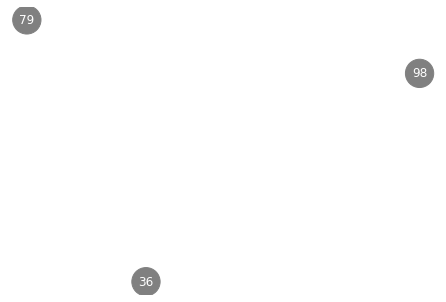

In [ ]:
SubProblemas = 0
opt = dynamicOptST(k, pi, len(k), False, True)
print(colored(f"\n* El costo óptimo esperado de realizar una búsqueda sería de","yellow"),opt, colored("nodos visitados --","yellow")+
      colored(f"\n* Se resolveran","yellow"),SubProblemas, colored("sub-problemas en total --","yellow")+
      colored(f"\n* El árbol tendrá","yellow"), len(k) ,colored("nodos --","yellow"))
print("\n")
 
print(colored("/-----------             Árbol                -----------/","blue")) # No se pudo lograr implementar correctamente 

# **3.Tiempo de ejecución**


## **Bottom-up**

### *Teorema (Complejidad Temporal).*

El algoritmo Optimal Binary Search Tree implementado a traves de ***Bottom-up*** tiene un ***tiempo de ejecución*** de $O(n^3)$.

### *Prueba del teorema.*

**Lógica**

Para la resolución de este problema tenemos 3 bucles, el bucle grande es para recorrer el tamaño de la cadena que conformara los nodos del árbol. El bucle mediano maneja la obtención de algunos datos, además de comprobar que se puede seguir. Y finalmente el bucle más interno, se encarga de todos los sub-problemas a resolver antes de ser capaz de resolver el problema real (refiriéndose a probar combinaciones usando cada dato como raíz y evaluando el costo de las operaciones para los árboles de menor tamaño).

Cada problema tiene en cuenta que tenemos el costo óptimo de sus sub-problemas (el problema para árboles más pequeños y del mismo tamaño con raíz distinta). Y con ese dato, dentro del bucle chico se resuelve el problema en un tiempo de ejecución $n-1 \rightarrow O(n)$

Para el costo *óptimo* del árbol con $n^2$ veces un problema con tiempo de ejecución $O(n)$. Por eso el algoritmo **bottom-up** para resolver `Optimal Binary Search Tree` es de $n * (\frac{n^2}{2}-1) → O(n^3)$.

**Problema matemático**

Podemos ver el tiempo de ejecución de todos los subproblemas como sumatoria, debemos resolver todos los subproblemas de tamaño $j=1...n$ por cada valor tomado de raíz siendo $n$ raíces posibles, el total de tiempo de ejecución de los subproblemas seria la suma de todos los subproblemas.

Cada subproblema tiene tiempo de ejecución $T_{sub}(n) = n$.

$\frac{1}{2} * \displaystyle \sum_{j=0}^{n-1}T_{sub}(j)^2 = \frac{(n-1)(n-2)(2(n-1)+1)}{12} = = \frac{(n^2 - 3n + 2)(2n-1)}{12} = \frac{2n^3 - 6n^2 + 4n - n^2 + 3n -2}{12} = \frac{2n^3 - 7n^2 + 7n -2}{12} → O(n^3)$

Y el tiempo de ejecución del problema sería el de los subproblemas más $n$ (siendo $n$ el tiempo del problema con los subproblemas resueltos).

Quedando lo siguiente como complejidad del algoritmo:

$\frac{2n^3 - 7n^2 + 7n -2}{12} + n = \frac{2n^3 - 7n^2 + 7n + 12n -2}{12} = \frac{2n^3 - 7n^2 + 19n -2}{12} → O(n^3)$

###*Teorema (Complejidad Espacial)*.

*El algoritmo "Optimal Binary Search Tree" implementado a través de **Bottom-up** tiene una complejidad espacial de $O(n^2)$.*

####*Prueba del teorema.*

Para la resolución de este problema, además de los datos necesario que deben ser proporcionados, se debe crear una matriz de *costos* $cost$ de $n$ x $n$ dimensiones, donde se irán guardando los *costos óptimos* de cada subproblema}.

Por ejemplo, en el cuando tengamos el tamaño $x=4$, guardaremos su *costo óptimo* en $cost_4$ para su posterior uso cuando tengamos $x=x+1$.

Por eso la memoria extra que requiere el problema es de $n^2 \rightarrow O(n^2)$.

Ahora si queremos crear el *árbol* que tiene *costo óptimo* necesitaremos además una matriz de *raíz* $root$ de $n$ x $n$ dimensiones.


Por eso, para poder crear el *árbol* de *costo óptimo* la memoria extra que requiere el problema es de $n^2 + n^2 = 2n^2 \rightarrow O(n^2)$.

# **4. Correctitud**

## **Bottom-up**

### **Teorema (Correctitud).**

El algoritmo entrega el costo optimo, es decir, cantidad de nodos esperados a visitar al realizar una búsqueda en un árbol de búsqueda binario de $n$ nodos.

#### **Prueba del Teorema**

Probaremos la siguiente **propiedad invariante de bucle** para el algoritmo `Optimal Binary Search Tree`:

> Al comienzo de cada iteración $i$ del bucle más grande, tendremos el costo óptimo de nodos a visitar del *árbol* con $i=i-1...0$ *nodos* calculado y guardado.

Esto es debido a que para obtener el costo optimo del *árbol de busqueda binara* prueba cada dato como nodo raiz evaluando el costo de dicho nodo como raiz mas el costo de cada posible sub-árbol que se puede formar.

#### **Inicialización**

Al comienzo de la primera iteración $i=1$, tendremos el costo óptimo del *árbol* con $i-1=0$ *nodos* lo cual es cierto, pues independientemente del término buscado, si el *árbol* tiene $0$ *nodos*. Entonces el costo optimo del *árbol* con $1$ *nodo* será el nodo que tenga menor frecuencia actuando como raíz en un *árbol* de $1$ *nodo*. Y se usara para $i>1$.


#### **Mantención**

Aplicando inducción, asumimos que al comienzo de cada iteración  se cumple la propiedad. Es decir, en la iteración $i$ tenemos el *costo óptimo* para los problemas $i=i-1...0$ calculado.

Consideremos que $i=x$ como el tamaño del problema con $x < n$.

En el bucle de en medio se obtiene el costo del dato $x$ y todos los datos que son menores llamándolo *sumaDeFreq* y el valor de $j$-

Dentro del bucle más pequeño, se calcula *costo óptimo* al usar de *raíz* $b$ de tal manera que $b=x...j$ usando los *costos óptimos* de datos previos a $x$ + la *sumaDeFreq*. Luego se comprueba si este resultado es un *costo óptimo* mayor al *costo optimo* más pequeño encontrado. Esto ocurre para cada valor de *raíz* posible de tomar.

A medida que la cantidad de datos que tendrá el *árbol* aumenta, el *costo óptimo* cambia.

Al finalizar la iteración $i=x$ (y al comienzo de la siguiente $i=x+1$), se seguirá cumpliendo la **propiedad invariante**.

####**Correctitud**

Finalmente, como la **propiedad de bucle invariante** es verdadera al inicio del bucle y se mantiene en cada iteración, podemos decir que al finalizar la $n$-ésima iteración del algoritmo, se obtendrá el costo óptimo de una búsqueda en un *árbol binario* con $n$ *nodos*.


# **5. Experimentos**


A continuación se realizará un experimento el cual incluye investigar:

* Observar lo que ocurre con el tiempo de ambos algoritmos a medida que crece el tamaño del problema.
* Observar lo que ocurre con el tiempo de ambos algoritmos y con el costo esperado calculado, si es que seleccionamos al elemento con mayor probabilidad de ser buscado como raiz del árbol (no consideramos otros elementos como raíz). Comentar si vale la pena realizar este cambio para problemas con n grande.



## **Implementación de gráficas**

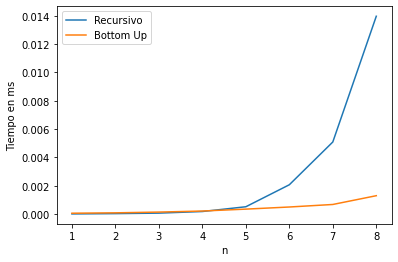

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(1,9):
    keys, p, q = OBIG(n)
    cantSubProblem = 0
    llamadasRecursivas = 0

    #la función repeat está ejecutando 5 veces optimalSearchTreeBottomUp y optimalSearchTreeRecursivo con el arreglo a y retorna el mejor tiepo obtenido.
    t1 = repeat(setup="from __main__ import dynamicOptST", stmt=f"dynamicOptST({keys}, {p}, {len(keys)})", repeat=1, number=10)
    t = repeat(setup="from __main__ import recurisveST", stmt=f"recurisveST({keys}, {p}, {len(keys)})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Recursivo", "Bottom Up"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

## **Con crecimiento en la cantidad de problemas**

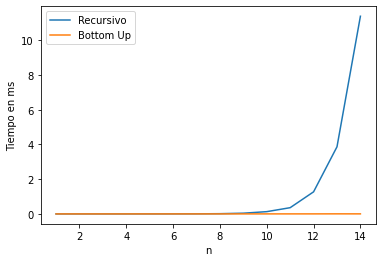

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(1,15):
    keys, p, q = OBIG(n)
    cantSubProblem = 0
    llamadasRecursivas = 0

    #la función repeat está ejecutando 5 veces optimalSearchTreeBottomUp y optimalSearchTreeRecursivo con el arreglo a y retorna el mejor tiepo obtenido.
    t1 = repeat(setup="from __main__ import dynamicOptST", stmt=f"dynamicOptST({keys}, {p}, {len(keys)})", repeat=1, number=10)
    t = repeat(setup="from __main__ import recurisveST", stmt=f"recurisveST({keys}, {p}, {len(keys)})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Recursivo", "Bottom Up"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

# **Análisis de resultados**

El resultado esperado sería que una implementación **dinámica** presentara menores tiempos que una **estática** (recursiva). A continuacuón se analizará si dicha declaración se cumplió o no.

La estratégia usada en la aproximación **bottom-Up** demostró una mayor eficiencia respecto a su contraparte recursiva, la diferencia de tiempo de ejecución entre ambas se hace exponencialmente mayor a que medida que el árbol crece en tamaño. Es apreciable que en ambas gráficas (la con más y menos nodos) la diferencia se hace mucho más notoria en cuanto $n$ alcanza un valor múltiplo de 6.

La causa de esta notoria diferencia es su propia implementación, es decir, la manera **recursiva** utiliza el paradigma "*fuerza bruta*", apreciable en el hecho de que se llama a sí misma para resolver subproblemas en repetidas ocasiones sin optimizar este proceso, por ello suele aumentar exponencialmente de tiempo conforme más crezca el árbol. Por su parte, la manera Dinámica o Bottom-up utiliza el método de la memorización para evitar la recursión, el cual, utilizando una matriz, permite almacenar subproblemas anteriores sin la necesidad de repetirlos para realizar nuevos cálculos. 

Por su parte el hecho de que crezca tanto en los múltiplos de 6, es debido a un efecto visual, pues, los rangos de $n$ seleccionados en ambas gráficas provocan que, por proporción, pareciera que justamente en esos puntos la gráfica creciera más en comparación a otros.



